1º Parte do Trabalho



Bibliotecas

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [9]:
def carregarImagem(caminho):

    imagem = cv2.imread(caminho)

    # Verifique se a leitura foi bem-sucedida
    if imagem is not None:
        print("Imagem carregada com sucesso!")
    else:
        print("Erro ao carregar a imagem. Verifique o caminho.")

    return imagem

Função para mostrar as imagens

In [10]:
def exibir_imagem(imagem, titulo="Imagem"):
    plt.imshow(imagem)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

In [11]:
import matplotlib.pyplot as plt

def exibir_imagens(imagem1, imagem2, imagem3):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(imagem1)
    axs[0].axis('off')

    axs[1].imshow(imagem2)
    axs[1].axis('off')

    axs[2].imshow(imagem3)
    axs[2].axis('off')

    plt.show()

# Exemplo de uso
# Suponha que você tenha três imagens chamadas imagem1, imagem2 e imagem3
# exibir_tres_imagens(imagem1, imagem2, imagem3)


In [12]:
#Exemplo de visualização alternativa(abre uma janela e espera uma tecla pra fechar)
#cv2.imshow("Imagem", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Detector de Harris

In [13]:
def detectorHarris(imagem, threshold=120, ponto=3, raio_threshold=10):
    # Converter a imagem para escala de cinza
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Aplicar o detector de Harris
    pontos_harris = cv2.cornerHarris(imagem_gray, 2, 3, 0.04)

    # Normalizar a imagem para valores entre 0 e 255
    cv2.normalize(pontos_harris, pontos_harris, 0, 255, cv2.NORM_MINMAX)

    # Definir um limiar para identificar os pontos de interesse
    pontos_interesse = np.where(pontos_harris > threshold)

    # Criar uma cópia da imagem original para desenhar os pontos
    imagem_com_pontos = imagem.copy()

    # Lista para armazenar os pontos admitidos
    pontos_admitidos = []

    # Verificar se cada ponto tem outro ponto dentro do raio_threshold
    for x, y in zip(pontos_interesse[1], pontos_interesse[0]):
        ponto_valido = True
        for px, py in pontos_admitidos:
            distancia = np.sqrt((x - px)**2 + (y - py)**2)
            if distancia < raio_threshold:
                ponto_valido = False
                break
        if ponto_valido:
            pontos_admitidos.append((x, y))
            cv2.circle(imagem_com_pontos, (x, y), ponto, (255, 0, 0), -1)

    # Número de pontos detectados
    num_pontos = len(pontos_admitidos)

    return imagem_com_pontos, num_pontos, pontos_admitidos


Imagem carregada com sucesso!
Imagem carregada com sucesso!
Imagem carregada com sucesso!


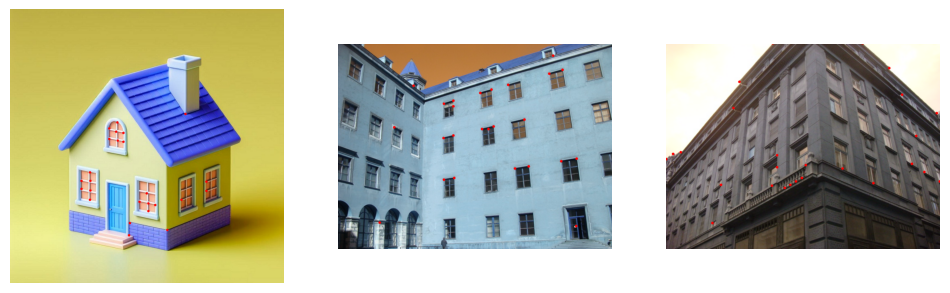

25 25 26


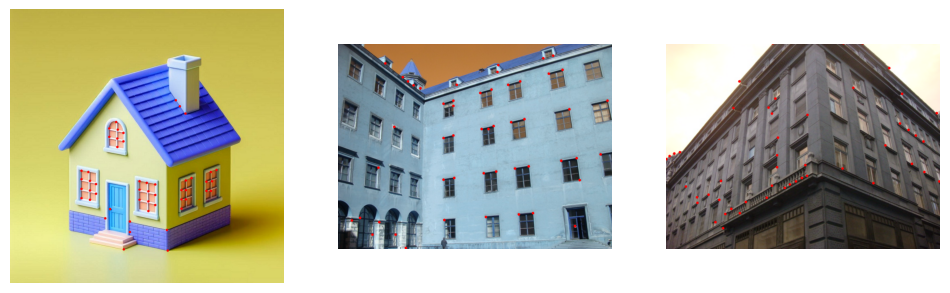

51 51 50


In [14]:
#Harris

imagem1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
imagem2 = carregarImagem("Imagens Fornecidas/dsc07633.jpg")
imagem3 = carregarImagem("Imagens Fornecidas/dsc07263.jpg")

#25 pontos
img1, pontos1, p = detectorHarris(imagem1, 170, 3, 10)
img2, pontos2, p = detectorHarris(imagem2, 115, 3, 10)
img3, pontos3, p = detectorHarris(imagem3, 139, 3, 10)

exibir_imagens(img1,img2,img3)
print(pontos1, pontos2, pontos3)

#50 pontos
img1, pontos1, p = detectorHarris(imagem1, 133, 3, 10)
img2, pontos2, p = detectorHarris(imagem2, 100, 3, 10)
img3, pontos3, p = detectorHarris(imagem3, 133.5, 3, 10)

exibir_imagens(img1,img2,img3)
print(pontos1, pontos2, pontos3)

Detector de SIFT

In [15]:
#ANTIGO DETECTOR !!!!!!!!!!!!!
#VAMOS USAR PARA COMPARAR COM O NOVO METODO

def detectorSIFT1(imagem, threshold=0.125, tamanho_pontos=7):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta a imagem para escala de cinza (o SIFT funciona em imagens em escala de cinza)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores com o SIFT
    keypoints, descritores = sift.detectAndCompute(imagem_gray, None)

    # Criar uma cópia da imagem original para desenhar os pontos
    imagem_com_pontos = imagem.copy()

    # Desenhe os keypoints na imagem
    for kp in keypoints:
        x, y = map(int, kp.pt)
        cv2.circle(imagem_com_pontos, (x, y), tamanho_pontos, (0, 255, 0), -1)

    # Número de pontos detectados
    num_pontos = len(keypoints)

    return imagem_com_pontos, num_pontos

In [16]:
def detectorSIFT(imagem, threshold=0.125, tamanho_pontos=7, raio_threshold=10):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta a imagem para escala de cinza (o SIFT funciona em imagens em escala de cinza)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores com o SIFT
    keypoints, descritores = sift.detectAndCompute(imagem_gray, None)

    # Lista para armazenar os pontos admitidos
    pontos_admitidos = []

    # Criar uma cópia da imagem original para desenhar os pontos
    imagem_com_pontos = imagem.copy()

    # Desenhe os keypoints na imagem
    for kp in keypoints:
        x, y = map(int, kp.pt)
        ponto_valido = True
        for px, py in pontos_admitidos:
            distancia = ((x - px)**2 + (y - py)**2)**0.5
            if distancia < raio_threshold:
                ponto_valido = False
                break
        if ponto_valido:
            pontos_admitidos.append((x, y))
            cv2.circle(imagem_com_pontos, (x, y), tamanho_pontos, (0, 255, 0), -1)

    # Número de pontos detectados
    num_pontos = len(pontos_admitidos)

    return imagem_com_pontos, num_pontos, pontos_admitidos


Imagem carregada com sucesso!
Imagem carregada com sucesso!
Imagem carregada com sucesso!


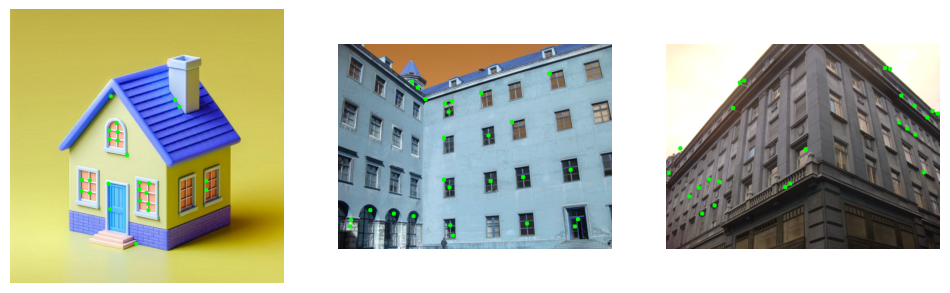

25 26 25


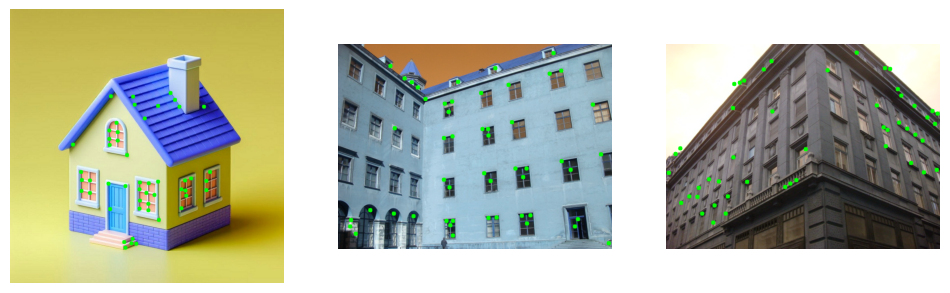

25 51 49


In [17]:
#Sift

imagem1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
imagem2 = carregarImagem("Imagens Fornecidas/dsc07633.jpg")
imagem3 = carregarImagem("Imagens Fornecidas/dsc07263.jpg")

#25 pontos
img1, pontos1, p = detectorSIFT(imagem1, 0.140, 5, 10)
img2, pontos2, p = detectorSIFT(imagem2, 0.192, 5, 10)
img3, pontos3, p = detectorSIFT(imagem3, 0.123, 5, 10)

exibir_imagens(img1,img2,img3)
print(pontos1, pontos2, pontos3)

#50 pontos
img1, pontos2, p = detectorSIFT(imagem1, 0.1233, 5, 10)
img2, pontos2, p = detectorSIFT(imagem2, 0.1775, 5, 10)
img3, pontos3, p = detectorSIFT(imagem3, 0.116, 5, 10)

exibir_imagens(img1,img2,img3)
print(pontos1, pontos2, pontos3)
cv2.imshow("Imagem", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detector ORB

In [18]:
def detectorORB(imagem, threshold=500, tamanho_pontos=3, raio_threshold=10):
    orb = cv2.ORB_create(scoreType=cv2.ORB_HARRIS_SCORE)  # Ou use cv2.ORB_FAST_SCORE
    orb.setScoreType(cv2.ORB_HARRIS_SCORE)  # Ou use cv2.ORB_FAST_SCORE
    orb.setMaxFeatures(threshold)

    kp, des = orb.detectAndCompute(imagem, None)

    # Lista para armazenar os pontos admitidos
    pontos_admitidos = []

    # Criar uma cópia da imagem original para desenhar os pontos
    imagem_com_pontos_orb = imagem.copy()

    # Desenhe os keypoints na imagem
    for ponto in kp:
        x, y = map(int, ponto.pt)
        ponto_valido = True
        for px, py in pontos_admitidos:
            distancia = ((x - px)**2 + (y - py)**2)**0.5
            if distancia < raio_threshold:
                ponto_valido = False
                break
        if ponto_valido:
            pontos_admitidos.append((x, y))
            cv2.circle(imagem_com_pontos_orb, (x, y), tamanho_pontos, (255, 255, 0), -1)

    # Número de pontos detectados
    num_pontos = len(pontos_admitidos)

    return imagem_com_pontos_orb, num_pontos, pontos_admitidos


Imagem carregada com sucesso!
Imagem carregada com sucesso!
Imagem carregada com sucesso!


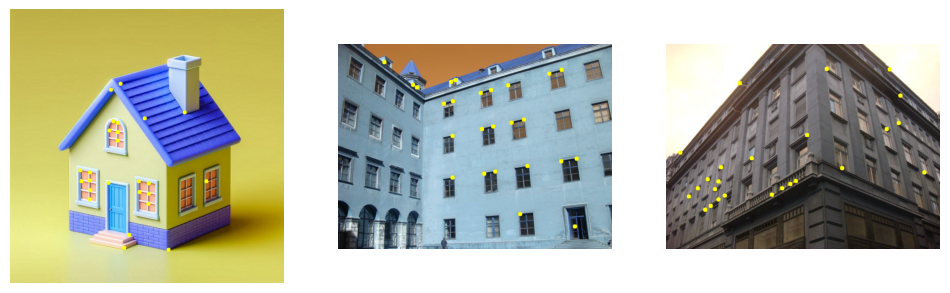

25 25 25


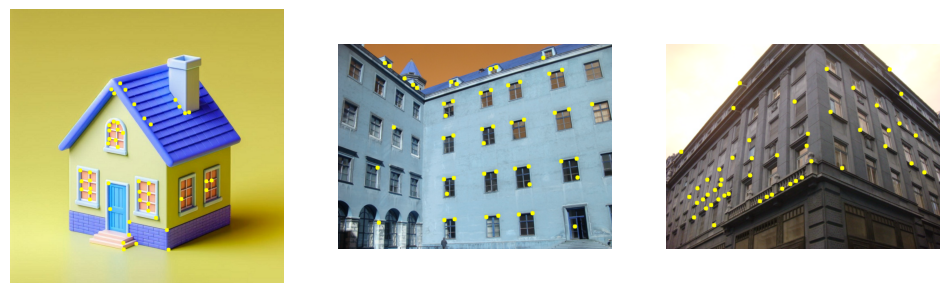

50 50 50


In [19]:
#Exemplo do ORB

imagem1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
imagem2 = carregarImagem("Imagens Fornecidas/dsc07633.jpg")
imagem3 = carregarImagem("Imagens Fornecidas/dsc07263.jpg")

#25 pontos
img1, pontos1, p = detectorORB(imagem1, 72, 5, 10)
img2, pontos2, p = detectorORB(imagem2, 75, 5, 10)
img3, pontos3, p = detectorORB(imagem3, 71, 5, 10)

exibir_imagens(img1,img2,img3)
print(pontos1, pontos2, pontos3)

#50 pontos
img1, pontos1, p = detectorORB(imagem1, 195, 5, 10)
img2, pontos2, p = detectorORB(imagem2, 205, 5, 10)
img3, pontos3, p = detectorORB(imagem3, 178, 5, 10)

exibir_imagens(img1,img2,img3)
print(pontos1, pontos2, pontos3)
cv2.imshow("Imagem", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

2º Questão

In [20]:
def correspondenciaSIFT(frame1, frame2, threshold=0.125):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta os frames para escala de cinza (o SIFT funciona em imagens em escala de cinza)
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores com o SIFT para ambos os frames
    keypoints1, descritores1 = sift.detectAndCompute(frame1_gray, None)
    keypoints2, descritores2 = sift.detectAndCompute(frame2_gray, None)

    # Crie o objeto BFMatcher
    bf = cv2.BFMatcher()

    # Encontre as melhores correspondências entre os descritores dos dois frames
    correspondencias = bf.knnMatch(descritores1, descritores2, k=2)

    # Filtrar correspondências usando o teste de razão de Lowe
    correspondencias_filtradas = [m for m, n in correspondencias if m.distance < 0.95 * n.distance]

    # Desenhe as correspondências nos frames
    imagem_com_correspondencias = cv2.drawMatches(frame1, keypoints1, frame2, keypoints2, correspondencias_filtradas, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Número de pontos correspondidos
    num_pontos_correspondidos = len(correspondencias_filtradas)

    return num_pontos_correspondidos, imagem_com_correspondencias

# Exemplo de uso:
# frame1 = cv2.imread('frame1.jpg')
# frame2 = cv2.imread('frame2.jpg')
# num_pontos_correspondidos, imagem_com_correspondencias = correspondencia_entre_frames(frame1, frame2)
# print(f"Número de pontos correspondidos: {num_pontos_correspondidos}")
# cv2.imshow('Correspondências', imagem_com_correspondencias)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [21]:
img1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
img2 = carregarImagem("Imagens Geradas/casa1frame2.jpg")

pontos1, imagem1 = correspondenciaSIFT(img1, img2, 0.150)

#exibir_imagem(imagem1)
cv2.imshow("Imagem", imagem1)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(pontos1)

Imagem carregada com sucesso!
Imagem carregada com sucesso!
35


SIFT

In [22]:
def correspondencia_SIFTv1(imagem1, imagem2, threshold=0.11):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta as imagens para escala de cinza
    imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

    imagemComVetores = imagem2.copy()

    # Encontre os keypoints e descritores para ambas as imagens
    keypoints1, descritores1 = sift.detectAndCompute(imagem1_gray, None)
    keypoints2, descritores2 = sift.detectAndCompute(imagem2_gray, None)

    # Use o objeto BFMatcher para fazer a correspondência dos descritores
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descritores1, descritores2, k=2)

    # Aplicar o teste de razão para obter bons matches
    pontos = []

    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            pt1 = keypoints1[m.queryIdx].pt
            pt2 = keypoints2[m.trainIdx].pt
            x1, y1 = map(int, pt1)
            x2, y2 = map(int, pt2)
            pontos.append([(x1, y1) , (x2, y2)])

    # Desenha os vetores de deslocamento
    for par_de_pontos in pontos:
        ponto_imagem1 = par_de_pontos[0]
        ponto_imagem2 = par_de_pontos[1]

        x1, y1 = ponto_imagem1
        x2, y2 = ponto_imagem2

        cv2.line(imagemComVetores, (x1, y1), (x2, y2), (0, 255, 0), 1)

    return imagemComVetores

In [48]:
def correspondencia_SIFTv2(imagem1, imagem2, threshold=0.11, limite_distancia=100):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta as imagens para escala de cinza
    imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

    imagemComVetores = imagem2.copy()

    # Encontre os keypoints e descritores para ambas as imagens
    keypoints1, descritores1 = sift.detectAndCompute(imagem1_gray, None)
    keypoints2, descritores2 = sift.detectAndCompute(imagem2_gray, None)

    # Use o objeto BFMatcher para fazer a correspondência dos descritores
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descritores1, descritores2, k=2)

    # Aplicar o teste de razão e teste de distância euclidiana
    pontos = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:  # Teste de razão
            pt1 = keypoints1[m.queryIdx].pt
            pt2 = keypoints2[m.trainIdx].pt
            distancia_euclidiana = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
            if distancia_euclidiana < limite_distancia:  # Teste de distância euclidiana
                x1, y1 = map(int, pt1)
                x2, y2 = map(int, pt2)
                pontos.append([(x1, y1) , (x2, y2)])

    # Desenha os vetores de deslocamento
    for par_de_pontos in pontos:
        ponto_imagem1 = par_de_pontos[0]
        ponto_imagem2 = par_de_pontos[1]

        x1, y1 = ponto_imagem1
        x2, y2 = ponto_imagem2

        cv2.line(imagemComVetores, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return imagemComVetores

In [24]:
def correspondencia_SIFTv3(imagem1, imagem2, threshold=0.125, limite_distancia=100):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta as imagens para escala de cinza
    imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

    imagemComVetores = imagem2.copy()

    # Encontre os keypoints e descritores para ambas as imagens
    keypoints1, descritores1 = sift.detectAndCompute(imagem1_gray, None)
    keypoints2, descritores2 = sift.detectAndCompute(imagem2_gray, None)

    # Use o objeto BFMatcher para fazer a correspondência dos descritores
    bf = cv2.BFMatcher()

    # Correspondência dos descritores da imagem1 para imagem2
    matches1to2 = bf.knnMatch(descritores1, descritores2, k=2)

    # Correspondência dos descritores da imagem2 para imagem1
    matches2to1 = bf.knnMatch(descritores2, descritores1, k=2)

    # Aplicar o teste de razão e teste de distância euclidiana
    pontos = []
    pontosConectados = 0

    # Ratio Test e Cross Check
    for m, n in matches1to2:
        if m.distance < 0.75 * n.distance:  # Teste de razão
            # Cross Check
            correspondencia_oposta = matches2to1[m.trainIdx]
            if correspondencia_oposta[0].trainIdx == m.queryIdx:
                pt1 = keypoints1[m.queryIdx].pt
                pt2 = keypoints2[m.trainIdx].pt
                distancia_euclidiana = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
                if distancia_euclidiana < limite_distancia:  # Teste de distância euclidiana
                    x1, y1 = map(int, pt1)
                    x2, y2 = map(int, pt2)
                    pontos.append([(x1, y1), (x2, y2)])

    # Desenha os vetores de deslocamento
    for par_de_pontos in pontos:
        ponto_imagem1 = par_de_pontos[0]
        ponto_imagem2 = par_de_pontos[1]

        x1, y1 = ponto_imagem1
        x2, y2 = ponto_imagem2

        cv2.line(imagemComVetores, (x1, y1), (x2, y2), (0, 255, 0), 2)

        pontosConectados += 1

    return imagemComVetores, pontosConectados

Imagem carregada com sucesso!
Imagem carregada com sucesso!


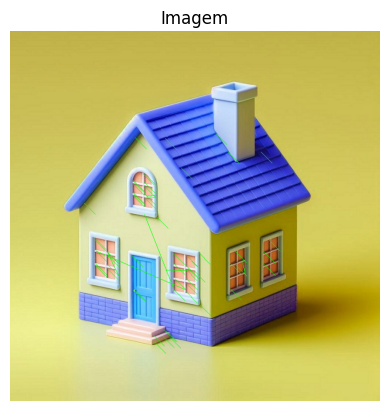

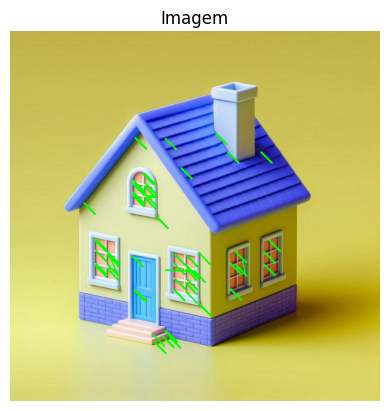

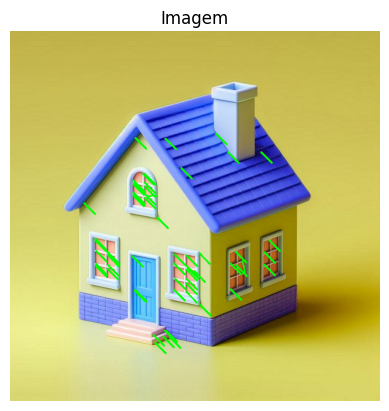

In [49]:
imagem1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
imagem2 = carregarImagem("Imagens Geradas/casa1frame2.jpg")

# Defina seu limite de distância euclidiana e threshold
limite_distancia = 70
threshold = 0.125

imgTeste1 = correspondencia_SIFTv1(imagem1, imagem2, threshold)         #Versão sem correção de erros(Padrão)
imgTeste2 = correspondencia_SIFTv2(imagem1, imagem2, threshold, limite_distancia)     #Correção de matches muito distantes(falso positivo)
imgTeste3, pts = correspondencia_SIFTv3(imagem1, imagem2, threshold, limite_distancia)     #Correção de matches duplicados(Matches com dois pontos apontando para o mesmo ponto)

exibir_imagem(imgTeste1)
exibir_imagem(imgTeste2)
exibir_imagem(imgTeste3)


ORB

In [26]:
def correspondencia_ORBv1(imagem1, imagem2, threshold=1000):
    # Crie o objeto do detector ORB
    orb = cv2.ORB_create()
    orb.setMaxFeatures(threshold)

    # Converta as imagens para escala de cinza
    imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores para ambas as imagens
    keypoints1, descritores1 = orb.detectAndCompute(imagem1_gray, None)
    keypoints2, descritores2 = orb.detectAndCompute(imagem2_gray, None)

    # Use o objeto BFMatcher para fazer a correspondência dos descritores
    bf = cv2.BFMatcher()

    # Correspondência dos descritores da imagem1 para imagem2
    matches1to2 = bf.knnMatch(descritores1, descritores2, k=2)

    # Aplicar o teste de razão e teste de distância euclidiana
    pontos = []

    # Ratio Test
    for m, n in matches1to2:
        if m.distance < 0.75 * n.distance:  # Teste de razão
                pt1 = keypoints1[m.queryIdx].pt
                pt2 = keypoints2[m.trainIdx].pt
                x1, y1 = map(int, pt1)
                x2, y2 = map(int, pt2)
                pontos.append([(x1, y1), (x2, y2)])

    # Desenha os vetores de deslocamento
    imagemComVetores = imagem2.copy()
    for par_de_pontos in pontos:
        ponto_imagem1 = par_de_pontos[0]
        ponto_imagem2 = par_de_pontos[1]

        x1, y1 = ponto_imagem1
        x2, y2 = ponto_imagem2

        cv2.line(imagemComVetores, (x1, y1), (x2, y2), (0, 255, 0), 1)

    return imagemComVetores

In [27]:
def correspondencia_ORBv2(imagem1, imagem2, limite_distancia=100, threshold=1000):
    # Crie o objeto do detector ORB
    orb = cv2.ORB_create()
    orb.setMaxFeatures(threshold)

    # Converta as imagens para escala de cinza
    imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores para ambas as imagens
    keypoints1, descritores1 = orb.detectAndCompute(imagem1_gray, None)
    keypoints2, descritores2 = orb.detectAndCompute(imagem2_gray, None)

    # Use o objeto BFMatcher para fazer a correspondência dos descritores
    bf = cv2.BFMatcher()

    # Correspondência dos descritores da imagem1 para imagem2
    matches1to2 = bf.knnMatch(descritores1, descritores2, k=2)

    # Aplicar o teste de razão e teste de distância euclidiana
    pontos = []

    # Ratio Test
    for m, n in matches1to2:
        if m.distance < 0.75 * n.distance:  # Teste de razão
                pt1 = keypoints1[m.queryIdx].pt
                pt2 = keypoints2[m.trainIdx].pt
                distancia_euclidiana = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
                if distancia_euclidiana < limite_distancia:  # Teste de distância euclidiana
                    x1, y1 = map(int, pt1)
                    x2, y2 = map(int, pt2)
                    pontos.append([(x1, y1), (x2, y2)])

    # Desenha os vetores de deslocamento
    imagemComVetores = imagem2.copy()
    for par_de_pontos in pontos:
        ponto_imagem1 = par_de_pontos[0]
        ponto_imagem2 = par_de_pontos[1]

        x1, y1 = ponto_imagem1
        x2, y2 = ponto_imagem2

        cv2.line(imagemComVetores, (x1, y1), (x2, y2), (0, 255, 0), 1)

    return imagemComVetores

In [28]:
def correspondencia_ORBv3(imagem1, imagem2, limite_distancia=100, threshold=1000):
    # Crie o objeto do detector ORB
    orb = cv2.ORB_create()
    orb.setMaxFeatures(threshold)

    # Converta as imagens para escala de cinza
    imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores para ambas as imagens
    keypoints1, descritores1 = orb.detectAndCompute(imagem1_gray, None)
    keypoints2, descritores2 = orb.detectAndCompute(imagem2_gray, None)

    # Use o objeto BFMatcher para fazer a correspondência dos descritores
    bf = cv2.BFMatcher()

    # Correspondência dos descritores da imagem1 para imagem2
    matches1to2 = bf.knnMatch(descritores1, descritores2, k=2)

    # Correspondência dos descritores da imagem2 para imagem1
    matches2to1 = bf.knnMatch(descritores2, descritores1, k=2)

    # Aplicar o teste de razão e teste de distância euclidiana
    pontos = []

    # Ratio Test e Cross Check
    for m, n in matches1to2:
        if m.distance < 0.75 * n.distance:  # Teste de razão
            # Cross Check
            correspondencia_oposta = matches2to1[m.trainIdx]
            if correspondencia_oposta[0].trainIdx == m.queryIdx:
                pt1 = keypoints1[m.queryIdx].pt
                pt2 = keypoints2[m.trainIdx].pt
                distancia_euclidiana = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
                if distancia_euclidiana < limite_distancia:  # Teste de distância euclidiana
                    x1, y1 = map(int, pt1)
                    x2, y2 = map(int, pt2)
                    pontos.append([(x1, y1), (x2, y2)])

    # Desenha os vetores de deslocamento
    imagemComVetores = imagem2.copy()
    for par_de_pontos in pontos:
        ponto_imagem1 = par_de_pontos[0]
        ponto_imagem2 = par_de_pontos[1]

        x1, y1 = ponto_imagem1
        x2, y2 = ponto_imagem2

        cv2.line(imagemComVetores, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return imagemComVetores

Imagem carregada com sucesso!
Imagem carregada com sucesso!


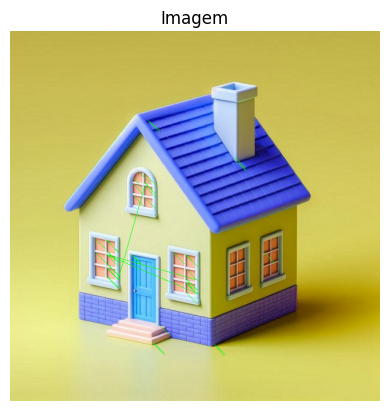

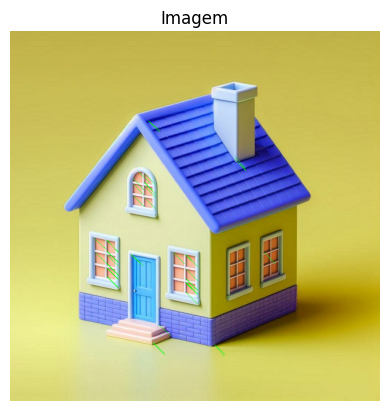

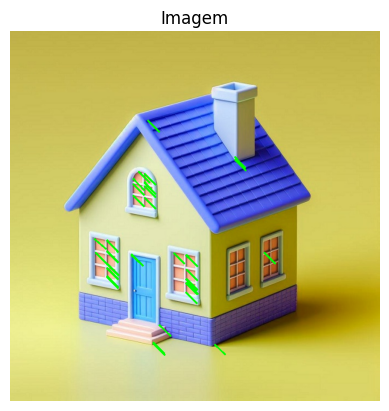

In [29]:
# Defina seu limite de distância euclidiana e threshold
limite_distancia = 65
threshold = 100

imagem1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
imagem2 = carregarImagem("Imagens Geradas/casa1frame2.jpg")

# Obtenha a imagem com os matches usando o ORB
imagemORB1 = correspondencia_ORBv1(imagem1, imagem2, threshold)
imagemORB2 = correspondencia_ORBv2(imagem1, imagem2, limite_distancia, threshold)
imagemORB3 = correspondencia_ORBv3(imagem1, imagem2, limite_distancia, threshold)

# Subtraia imagem2 de imagem1 e garanta que os valores estejam no intervalo [0, 255]
diferenca = np.clip(imagemORB2 - imagemORB3, 0, 255).astype(np.uint8)


# Exiba a imagem resultante com linhas conectando os pontos correspondentes
exibir_imagem(imagemORB1)
exibir_imagem(imagemORB2)
exibir_imagem(imagemORB3)

Lucas Kanede

In [30]:
def detectar_pontos_sift(imagem, threshold=0.125):

    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Converta a imagem para escala de cinza (o SIFT funciona em imagens em escala de cinza)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Encontre os keypoints e descritores com o SIFT
    keypoints, _ = sift.detectAndCompute(imagem_gray, None)

    # Extrai as coordenadas dos keypoints
    pontos = np.array([kp.pt for kp in keypoints], dtype=np.float32).reshape(-1, 1, 2)

    return pontos

In [31]:
def lucas_kanade(frame1, frame2, pontos):
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    pontos, status, erro = cv2.calcOpticalFlowPyrLK(gray1, gray2, pontos, None, winSize=(25, 25), maxLevel=3)

    pontos_validos = pontos[status == 1]

    return pontos_validos

Imagem carregada com sucesso!
Imagem carregada com sucesso!


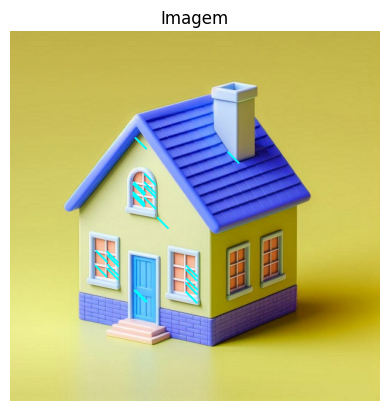

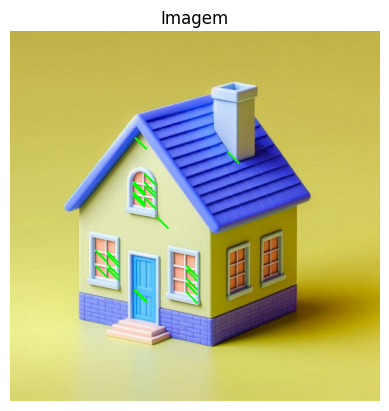

Pontos do descritor: 33 
 Pontos Fluxo otico: 36


In [32]:

imagem1 = carregarImagem("Imagens Geradas/casa1frame1.jpg")
imagem2 = carregarImagem("Imagens Geradas/casa1frame2.jpg")

# Detecta pontos de interesse na primeira imagem usando o SIFT
pontos_sift = detectar_pontos_sift(imagem1, 0.15)

# Aplica o Método de Lucas-Kanade para rastrear os pontos na segunda imagem
pontos_rastreados = lucas_kanade(imagem1, imagem2, pontos_sift)

# Desenha os pontos detectados pelo SIFT em azul
imagem_combinada = imagem2.copy()

ptsFluxo = 0

# Traça linhas entre os pontos SIFT e Lucas-Kanade
for ponto_sift, ponto_lucas in zip(pontos_sift, pontos_rastreados):
    x1, y1 = ponto_sift.ravel()
    x2, y2 = ponto_lucas.ravel()
    cv2.line(imagem_combinada, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)
    ptsFluxo +=1

descritor, ptsDescritor = correspondencia_SIFTv3(imagem1, imagem2, 0.15, 51)

# Exibe a imagem combinada
exibir_imagem(imagem_combinada)
exibir_imagem(descritor)

print('Pontos do descritor:', ptsDescritor,'\n','Pontos Fluxo otico:', ptsFluxo)

Horn Schunck

In [33]:
#Falta implementar

# Etapa Final

### Primeira parte
Analisar na imagem e identificar quais os pontos mais fortes aplicando diferentes detectores e pegando os pontos que se repetem

In [34]:
#Comparar Vetores de Pontos

def comparador(vetorA, vetorB, raio_threshold=3):
    vetorAux = []

    #comparação A com B
    for A in vetorA:
        ponto_valido = False
        for B in vetorB:
            distancia = math.sqrt((A[0] - B[0])**2 + (A[1] - B[1])**2)
            if distancia < raio_threshold:
                ponto_valido = True
                break
        if ponto_valido:
            vetorAux.append(A)

    return vetorAux

In [35]:
#Carrega imagem
img1 = carregarImagem("Imagens Geradas/casa2frame1.jpg")
img2 = carregarImagem("Imagens Geradas/casa2frame2.jpg")

imgHarris, numPontosHarris, pontosHarris = detectorHarris(img1, threshold=130, ponto=5, raio_threshold=10)
imgSIFT, numPontosSIFT, pontosSIFT = detectorSIFT(img1, threshold=0.162, tamanho_pontos=5, raio_threshold=10)
imgORB, numPontosORB, pontosORB = detectorORB(img1, threshold=100, tamanho_pontos=5, raio_threshold=10)

aux = comparador(pontosHarris, pontosSIFT, 10)
pontos_em_comum = comparador(aux, pontosORB, 10)

#Lukas Kanede
pontosLukas1 = np.array(pontos_em_comum, dtype=np.float32).reshape(-1, 1, 2)
pontosLukas2 = lucas_kanade(img1, img2, pontosLukas1)

imgLukas = img2.copy()

# Traça linhas entre os pontos_em_comum e os do Lucas-Kanade
for pontosLukas1, pontosLukas2 in zip(pontosLukas1, pontosLukas2):
    x1, y1 = pontosLukas1.ravel()
    x2, y2 = pontosLukas2.ravel()
    cv2.line(imgLukas, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)
    ptsFluxo +=1

print(pontos_em_comum)
print(len(pontos_em_comum))

print(numPontosHarris, numPontosSIFT, numPontosORB)

cv2.imwrite("imgLukas.jpg", imgLukas)

cv2.imshow("HARRIS", imgHarris)
cv2.imshow("SIFT", imgSIFT)
cv2.imshow("ORB", imgORB)
cv2.imshow("lukas", imgLukas)
cv2.waitKey(0)
cv2.destroyAllWindows()


Imagem carregada com sucesso!
Imagem carregada com sucesso!


[(403, 127), (269, 141), (759, 472), (781, 477), (744, 480), (631, 483), (612, 492), (494, 497), (476, 506), (495, 539), (758, 661), (745, 669), (495, 691), (476, 700), (758, 702), (781, 706), (758, 731), (495, 732)]
18
30 31 31


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def lucas_kanade2(frame1, frame2, pontos, janela=25):
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    pontos, status, erro = cv2.calcOpticalFlowPyrLK(gray1, gray2, pontos, None, winSize=(janela, janela), maxLevel=3)

    # Verificar se status é um array válido e não está vazio
    if status is not None and status.size > 0:
        pontos_validos = pontos[status.flatten() == 1]
        return pontos_validos
    else:
        # Lida com a situação onde status não é válido ou está vazio
        return None


In [3]:
def detectorSIFT(imagem, threshold=0.125, tamanho_pontos=7, raio_threshold=10):
    # Crie o objeto do detector SIFT
    sift = cv2.SIFT_create()

    # Ajuste o threshold de contraste (ajuste conforme necessário)
    sift.setContrastThreshold(threshold)

    # Converta a imagem para escala de cinza (o SIFT funciona em imagens em escala de cinza)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Encontre os keypoints e descritores com o SIFT
    keypoints, descritores = sift.detectAndCompute(imagem_gray, None)

    # Lista para armazenar os pontos admitidos
    pontos_admitidos = []

    # Criar uma cópia da imagem original para desenhar os pontos
    imagem_com_pontos = imagem.copy()

    # Desenhe os keypoints na imagem
    for kp in keypoints:
        x, y = map(int, kp.pt)
        ponto_valido = True
        for px, py in pontos_admitidos:
            distancia = ((x - px)**2 + (y - py)**2)**0.5
            if distancia < raio_threshold:
                ponto_valido = False
                break
        if ponto_valido:
            pontos_admitidos.append((x, y))
            cv2.circle(imagem_com_pontos, (x, y), tamanho_pontos, (0, 255, 0), -1)

    # Número de pontos detectados
    num_pontos = len(pontos_admitidos)

    return imagem_com_pontos, num_pontos, pontos_admitidos

In [4]:
def pegarDescritor(frame, posicao):

    ponto_chave = [cv2.KeyPoint(posicao[0], posicao[1], 1)]

    sift = cv2.SIFT_create()

    frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, descritor = sift.compute(frameGray, ponto_chave)
    
    return descritor[0]

In [5]:
def compararDescritor(descritor1, descritor2, limiar=500.0):

    distancia = np.linalg.norm(descritor1 - descritor2)

    if distancia < limiar:
        return True
    else:
        return False


In [9]:
video_path = 'video3.mp4'
cap = cv2.VideoCapture(video_path)

primeira = True
buscar = False
isPreditor = False
pontoAtualErrado = False
caminhoDetector = []
caminhoPreditor = []
caminhoPonderado = []
i=0
limiar = 500


while cap.isOpened():
    ret, frame = cap.read()

    if(primeira):
        a, l, c = frame.shape

    if not ret:
        break

    pontoAtualErrado = False

    #Se for a primeira iteracao tente achar um ponto
    if(primeira):

        img, numP, Ponto = detectorSIFT(frame, 0.150, 5, 1)
        
        #Se ele detectar um ponto, se nao ele ignora e procura no frame seguinte
        if(numP != 0):
            primeira = False
            pontoFrameAntes = np.array(Ponto, dtype=np.float32).reshape(-1, 1, 2)
            frameAntes = frame
            descritorAntes = pegarDescritor(frame, (pontoFrameAntes[0][0][0], pontoFrameAntes[0][0][1]))
            print('Primeiro')
        
    else:

        print(f"pontoFrameAntes: {pontoFrameAntes}")

        #Detector
        pontoFrameAtual = lucas_kanade2(frameAntes, frame, pontoFrameAntes, 50)
        if pontoFrameAtual.size != 0:
            caminhoDetector.append([int(pontoFrameAtual[0][0][0]), int(pontoFrameAtual[0][0][1])])
        
        descritorAtual = pegarDescritor(frame, (pontoFrameAtual[0][0][0], pontoFrameAtual[0][0][1]))
            
        descritorValido = compararDescritor(descritorAntes, descritorAtual, limiar)
        
        if not descritorValido:
            pontoAtualErrado = True

        #Preditor
        if(isPreditor):
            previsto = pontoFrameAntes + preditor
        else:
            previsto = pontoFrameAtual
            isPreditor = True

        caminhoPreditor.append([int(previsto[0][0][0]), int(previsto[0][0][1])])

        #Se o detector não encontrar nada ele usa o previsto, se não ele pondera entre eles
        if pontoFrameAtual.size == 0 or pontoAtualErrado:
            pontoFrameAtual = previsto
            print("Previ")
            buscar = True
            
        
        pontoPonderado = (pontoFrameAtual + previsto) / 2
        caminhoPonderado.append([int(pontoPonderado[0][0][0]), int(pontoPonderado[0][0][1])])

        #Cacula o deslocamento em X e Y
        if not pontoAtualErrado:
            preditor = [(pontoPonderado[0][0][0] - pontoFrameAntes[0][0][0]), (pontoPonderado[0][0][1] - pontoFrameAntes[0][0][1])]
            preditor = np.array(preditor, dtype=np.float32).reshape(-1, 1, 2)

        print(f"pontoFrameAtual: {pontoFrameAtual}")
        print(f"pontoPonderado:  {pontoPonderado}")

        x = pontoPonderado[0][0][0]
        y = pontoPonderado[0][0][1]

        #Verifica se o ponto saiu da cena
        if x <= 0 or y <=0 or x > l or y > a:
            print("Saiu da Cena")
            break

        print(f"Predito:         {preditor}")

        #Detector
        for x, y in caminhoDetector:
            cv2.circle(frame, (x, y), 3, (20, 20, 20), -1)
            cv2.imshow('Caminho', frame)
        #Preditor
        for x, y in caminhoPreditor:
            cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
            cv2.imshow('Caminho', frame)
            
        #Ponderado
        for x, y in caminhoPonderado:
            cv2.circle(frame, (x, y), 3, (125, 125, 125), -1)
            cv2.imshow('Caminho', frame)

        frameAntes = frame
        pontoFrameAntes = pontoPonderado

        cv2.waitKey(0)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cv2.imshow("Primeira Deteccao",img)

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

Primeiro
pontoFrameAntes: [[[ 13. 474.]]]
pontoFrameAtual: [[[ 33.593884 472.88464 ]]]
pontoPonderado:  [[[ 33.593884 472.88464 ]]]
Predito:         [[[20.593884  -1.1153564]]]
pontoFrameAntes: [[[ 33.593884 472.88464 ]]]
pontoFrameAtual: [[[ 53.777985 471.8333  ]]]
pontoPonderado:  [[[ 53.982876 471.8013  ]]]
Predito:         [[[20.388992  -1.0833435]]]
pontoFrameAntes: [[[ 53.982876 471.8013  ]]]
pontoFrameAtual: [[[ 73.65492 470.9608 ]]]
pontoPonderado:  [[[ 74.0134  470.83936]]]
Predito:         [[[20.030521  -0.9619446]]]
pontoFrameAntes: [[[ 74.0134  470.83936]]]
Previ
pontoFrameAtual: [[[ 94.043915 469.8774  ]]]
pontoPonderado:  [[[ 94.043915 469.8774  ]]]
Predito:         [[[20.030521  -0.9619446]]]
pontoFrameAntes: [[[ 94.043915 469.8774  ]]]
Previ
pontoFrameAtual: [[[114.07443 468.91547]]]
pontoPonderado:  [[[114.07443 468.91547]]]
Predito:         [[[20.030521  -0.9619446]]]
pontoFrameAntes: [[[114.07443 468.91547]]]
pontoFrameAtual: [[[132.04349 467.85675]]]
pontoPonderado: